In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [5]:
from keras.datasets import fashion_mnist

In [8]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

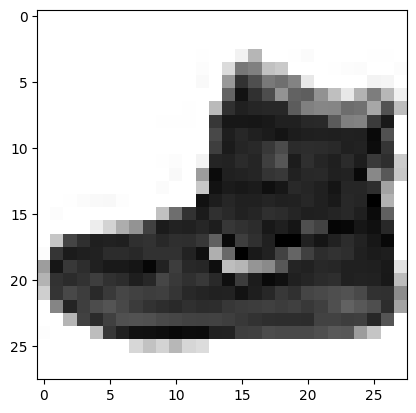

In [13]:
plt.imshow(X_train[0], cmap='binary')

In [14]:
classes = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

Text(0.5, 1.0, 'Ankle boot')

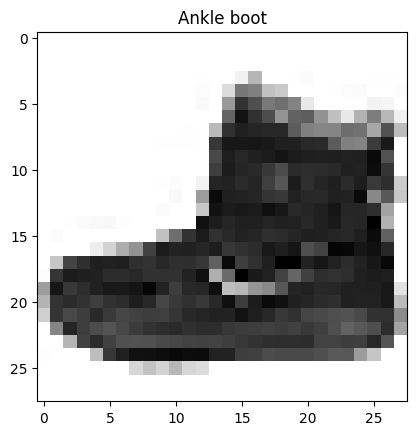

In [16]:
index = 0
plt.imshow(X_train[index], cmap='binary')
plt.title(classes[y_train[index]])

In [23]:
def normalize(X):
  return X/X.max()

In [26]:
X_train_norm = normalize(X_train)
X_test_norm = normalize(X_test)

In [52]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [53]:
epochs = 25
model_history = model.fit(X_train_norm, y_train, epochs=epochs)

Epoch 1/25
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6282 - accuracy: 0.7809
Epoch 2/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4419 - accuracy: 0.8451
Epoch 3/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4112 - accuracy: 0.8544
Epoch 4/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3938 - accuracy: 0.8611
Epoch 5/25
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3806 - accuracy: 0.8653
Epoch 6/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3708 - accuracy: 0.8682
Epoch 7/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3632 - accuracy: 0.8702
Epoch 8/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3563 - accuracy: 0.8724
Epoch 9/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3504 - accuracy: 0.8737
Epoch 10/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.345

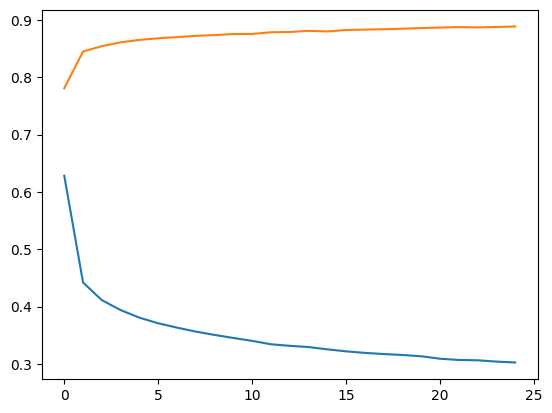

In [54]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['accuracy'])


In [55]:
model.evaluate(X_test_norm, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.4183 - accuracy: 0.8566


[0.41830897331237793, 0.8565999865531921]

In [56]:
from sklearn.metrics import confusion_matrix

In [57]:
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [60]:
y_pred = y_pred.argmax(axis=1)

In [63]:
cf = confusion_matrix(y_pred, y_test)

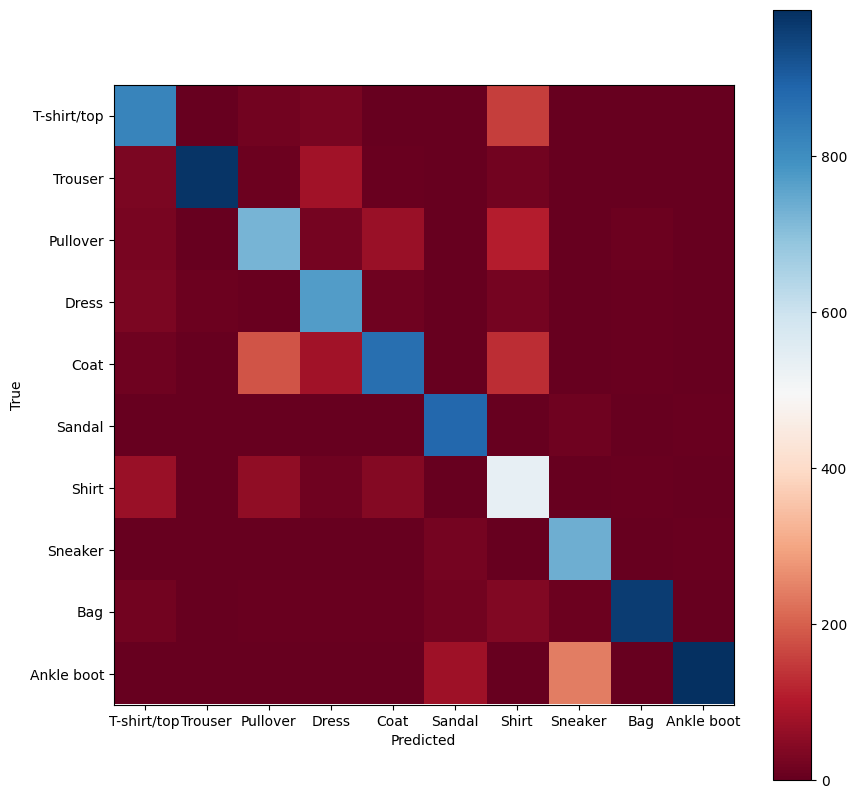

In [71]:
plt.figure(figsize=(10,10))
plt.imshow(cf, cmap='RdBu')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(np.arange(10),classes)
plt.yticks(np.arange(10),classes)
plt.colorbar()

In [72]:
def show_random_pred(X_test, y_test, y_pred, classes):

  random_index = np.random.randint(0, X_test.shape[0]-1)
  plt.imshow(X_test[random_index], cmap='binary')
  if y_pred[random_index] == y_test[random_index]:
    color = 'green'
  else:
    color = 'red'

  plt.title(f'Predicted: {classes[y_pred[random_index]]}\nActual: {classes[y_test[random_index]]}', color=color)

In [85]:
def show_4_random():
  plt.figure(figsize=(7,7))
  for i in range(4):
    plt.subplot(2,2,i+1)
    show_random_pred(X_test, y_test, y_pred, classes)
    plt.axis('off')
  plt.show()

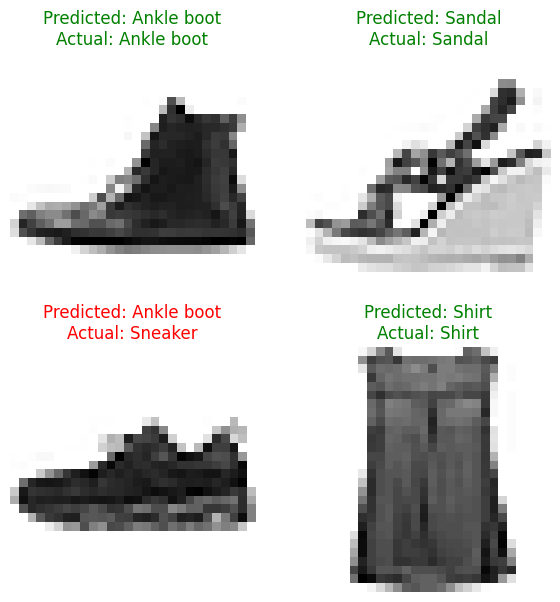

In [86]:
show_4_random()

In [88]:
model.predict(X_test[0].reshape(1,28,28))

1/1 [==============================] - 0s 25ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [102]:
def make_prediction(model, X_test, y_test, classes, category):

  label = classes.index(category)
  random_index = np.random.randint(0, X_test.shape[0]-1)
  while y_test[random_index] != label:
    random_index = np.random.randint(0, X_test.shape[0]-1)

  y_pred = model.predict(X_test[random_index].reshape(1,28,28))
  y_pred = y_pred.argmax(axis=1).astype(int)[0]

  plt.imshow(X_test[random_index], cmap='binary')
  if y_pred == y_test[random_index]:
    color = 'green'
  else:
    color = 'red'

  plt.title(f'Predicted: {classes[y_pred]}', color=color)
  plt.show()

1/1 [==============================] - 0s 23ms/step


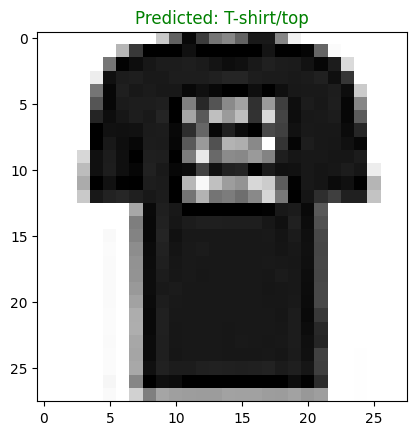

In [104]:
make_prediction(model, X_test, y_test, classes, 'T-shirt/top')